# chap1. 서울시 구별 CCTV 현황 분석

## 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas

In [ ]:
import pandas as pd

`read_csv` : CSV 파일을 읽는 명령  
여기서 사용할 CCTV 데이터는 UTF-8로 인코딩 되어있어서 `read_csv` 명령을 쓸 때  
`encoding` 옵션에 UTF-8을 지정한다.  
`head()` : pandas 데이터의 첫 5행만 보여준다.

In [4]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


pandas 데이터는 제일 첫 줄에 보이는 것이 해당하는 열(column)을 대표하는 일종의 제목.  
그래서 첫 줄을 특별히 column이라고 함.  
데이터 뒤에 column라고 하면 column의 이름들이 반환됨.

In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
CCTV_Seoul.columns[0]

'기관명'

`rename` : 이름을 바꾸는 명령  
명령 안에 사용된 `inplace=True`는 실제 CCTV_Seoul이라는 변수의 내용을 갱신하라는 의미

In [7]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


`read_excel` : 엑셀 파일 읽기.  
엑셀의 구조에 따라 인코딩만 지정하면 어색하게 출력된다.  
(위 3줄이 제목처럼 되어 있다.)

In [9]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


엑셀 파일을 읽을 때는 옵션을 더 적용한다.  
`header=2` : 세 번째 줄부터 읽으라는 옵션  
`parse_cols='B, D, G, J, N` : B, D, G, J, N 열만 읽으라는 옵션

In [11]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',
                         header = 2,
                         usecols = 'B, D, G, J, N',
                         encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


컬럼의 이름을 `rename`으로 변경 및 정리

In [12]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


CCTV_Seoul이라는 변수에 '구별 CCTV 현황',  
pop_Seoul이라는 변수에 '구별 인구 현황'을 저장 함.

## pandas 기초 익히기

In [13]:
import pandas as pd
import numpy as np

In [14]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

`Series` : pandas의 데이터 유형 중 기초가 되는 것  
대괄호로 만드는 파이썬의 list 데이터로 만들 수 있다.  
중간에 NaN(Not A Number)도 있다.

In [15]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

`date_range` : pandas의 날짜형의 데이터  
기본 날짜를 지정하고, `periods` 옵션으로 6일간이라고 지정

In [16]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,-0.090217,0.354886,2.203284,-1.753086
2013-01-02,0.276850,-0.062219,1.322821,-0.509167
2013-01-03,-0.544485,0.171098,0.480904,0.636615
2013-01-04,0.991296,0.376740,0.684394,1.478441
2013-01-05,-0.321214,0.277409,0.955384,0.845589
2013-01-06,-1.346144,1.439711,-1.324605,-1.855574


`DataFrame` 유형의 데이터를 만듬.  
6행 4열의 `random` 변수를 만들고, 컬럼에는 `columns=['A','B','C','D']`로 지정하고, `index` 명령으로 날짜형 데이터인 `dates`를 `index=dates` 옵션을 이용해서 지정함.

In [17]:
df.head(3)

,A,B,C,D
2013-01-01,-0.090217,0.354886,2.203284,-1.753086
2013-01-02,0.276850,-0.062219,1.322821,-0.509167
2013-01-03,-0.544485,0.171098,0.480904,0.636615


`head()`명령은 기본적으로 첫 5행을 보여주지만, 숫자를 인수로 넣으면 그 숫자만큼의 행을 볼 수 있다.

In [18]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`index`, `columns` 명령을 이용하면 pandas의 DataFrame의 컬럼과 인덱스를 확인할 수 있다.

In [20]:
df.values

array([[-0.09021714,  0.35488614,  2.20328414, -1.7530861 ],
       [ 0.27684964, -0.06221871,  1.32282081, -0.50916701],
       [-0.54448532,  0.17109755,  0.48090362,  0.63661484],
       [ 0.99129569,  0.37673997,  0.68439405,  1.47844125],
       [-0.32121356,  0.27740875,  0.95538424,  0.84558924],
       [-1.3461442 ,  1.4397113 , -1.32460508, -1.85557399]])

`values` 명령으로 내용을 확인 할수 있다. `info()` 명령으로 DataFrame의 개요를 알 수 있다.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


`describe()` 명령은 통계적 개요를 확인 할 수 있다.  
개수(count)와 평균(mean)뿐만 아니라 min, max와 각 1/4 지점, 표준편차까지 한번에 알 수 있다.

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.172319,0.426271,0.720364,-0.192864
std,0.787532,0.521633,1.171134,1.404181
min,-1.346144,-0.062219,-1.324605,-1.855574
25%,-0.488667,0.197675,0.531776,-1.442106
50%,-0.205715,0.316147,0.819889,0.063724
75%,0.185083,0.371277,1.230962,0.793346
max,0.991296,1.439711,2.203284,1.478441


`values`가 숫자가 아니라 문자라고 하더라도 그에 맞는 개요가 나온다.

In [23]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-06,-1.346144,1.439711,-1.324605,-1.855574
2013-01-04,0.991296,0.376740,0.684394,1.478441
2013-01-01,-0.090217,0.354886,2.203284,-1.753086
2013-01-05,-0.321214,0.277409,0.955384,0.845589
2013-01-03,-0.544485,0.171098,0.480904,0.636615
2013-01-02,0.276850,-0.062219,1.322821,-0.509167


`sort_values` 명령은 `by`로 지정된 컬럼을 기준으로 정렬.  
`ascending` 옵션으로 내림차순이나 오름차순으로 정렬시킬 수 있다.

In [24]:
df

,A,B,C,D
2013-01-01,-0.090217,0.354886,2.203284,-1.753086
2013-01-02,0.276850,-0.062219,1.322821,-0.509167
2013-01-03,-0.544485,0.171098,0.480904,0.636615
2013-01-04,0.991296,0.376740,0.684394,1.478441
2013-01-05,-0.321214,0.277409,0.955384,0.845589
2013-01-06,-1.346144,1.439711,-1.324605,-1.855574


내용이 너무 많으면 Jupyter Notebook에서 내용을 줄여서 보여준다.

In [25]:
df['A']



2013-01-01   -0.090217
2013-01-02    0.276850
2013-01-03   -0.544485
2013-01-04    0.991296
2013-01-05   -0.321214
2013-01-06   -1.346144
Freq: D, Name: A, dtype: float64

DataFrame으로 선언된 변수의 경우 변수명 뒤에 ['A']와 같이 붙여주면 해당 컬럼만 Series로 보여준다.  
중간부터 보려면 `df[0:3]`처럼 범위를 지정해 준다.

In [27]:
df[0:3]

,A,B,C,D
2013-01-01,-0.090217,0.354886,2.203284,-1.753086
2013-01-02,0.276850,-0.062219,1.322821,-0.509167
2013-01-03,-0.544485,0.171098,0.480904,0.636615


특정 범위의 행을 지정할 수 있다.

In [28]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.276850,-0.062219,1.322821,-0.509167
2013-01-03,-0.544485,0.171098,0.480904,0.636615
2013-01-04,0.991296,0.376740,0.684394,1.478441


`df.loc` : dates 변수를 이용해 특정 날짜의 데이터만 보여준다.  
`loc`은 location 옵션으로 슬라이싱할 때 loc 옵션을 이용해서 위치 값을 지정할 수 있다.

In [29]:
df.loc[dates[0]]

A   -0.090217
B    0.354886
C    2.203284
D   -1.753086
Name: 2013-01-01 00:00:00, dtype: float64

A, B열의 모든 행을 보려면 `df.loc[:,['A','B']]`라고 명령한다.

In [30]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.090217,0.354886
2013-01-02,0.276850,-0.062219
2013-01-03,-0.544485,0.171098
2013-01-04,0.991296,0.376740
2013-01-05,-0.321214,0.277409
2013-01-06,-1.346144,1.439711


행과 열의 범위를 모두 지정할 수도 있다.

In [33]:
# 2013년 1월 2일부터 2013년 1월 4일까지의 데이터 중 A와 B 컬럼의 데이터만 선택한다.
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.276850,-0.062219
2013-01-03,-0.544485,0.171098
2013-01-04,0.991296,0.376740


In [35]:
# 2013년 1월 2일의 A,B 컬럼의 내용을 확인
df.loc['20130102',['A','B']]

A    0.276850
B   -0.062219
Name: 2013-01-02 00:00:00, dtype: float64

dates[0]에 맞는 날짜인 2013년 1월 1일에 A컬럼의 데이터만 확인할 수 있다.  
`loc` 명령과 달리 `iloc`으로 행과 열의 번호를 이용해서 데이터에 바로 접근할 수 있다.  
`iloc`을 사용하면 행이나 열의 범위를 지정하면 됨. 콜론(`:`)을 사용하면 전체를 의미함.

In [36]:
df.loc[dates[0],'A']

-0.09021714188274846

`iloc`에 숫자만 표시하면 해당 숫자의 행을 의미한다.

In [38]:
# 0번부터 시작해서 4번행이 됨.
df.iloc[3]

A    0.991296
B    0.376740
C    0.684394
D    1.478441
Name: 2013-01-04 00:00:00, dtype: float64

In [40]:
# 3번째부터 4번째까지 행과 0번부터 1번까지 열의 데이터만 가져옴
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.991296,0.376740
2013-01-05,-0.321214,0.277409


In [41]:
# 범위가 아니라 콤마(,)로 행이나 열을 지정해서 데이터를 가져옴
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.276850,1.322821
2013-01-03,-0.544485,0.480904
2013-01-05,-0.321214,0.955384


In [42]:
# 한 쪽 전체를 의미하고 싶을 땐 그냥 클론만 사용
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.276850,-0.062219,1.322821,-0.509167
2013-01-03,-0.544485,0.171098,0.480904,0.636615


In [44]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.354886,2.203284
2013-01-02,-0.062219,1.322821
2013-01-03,0.171098,0.480904
2013-01-04,0.376740,0.684394
2013-01-05,0.277409,0.955384
2013-01-06,1.439711,-1.324605


In [45]:
df

,A,B,C,D
2013-01-01,-0.090217,0.354886,2.203284,-1.753086
2013-01-02,0.276850,-0.062219,1.322821,-0.509167
2013-01-03,-0.544485,0.171098,0.480904,0.636615
2013-01-04,0.991296,0.376740,0.684394,1.478441
2013-01-05,-0.321214,0.277409,0.955384,0.845589
2013-01-06,-1.346144,1.439711,-1.324605,-1.855574


DataFrame에서 특정 조건을 만족하는 데이터만 얻을 수 있음

In [46]:
# 컬럼 A에서 0보다 큰 행만 얻음
df[df.A > 0]

,A,B,C,D
2013-01-02,0.276850,-0.062219,1.322821,-0.509167
2013-01-04,0.991296,0.376740,0.684394,1.478441


데이터 전체에서 조건을 걸면 만족하지 않는 곳은 NaN 처리가 됨

In [47]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.354886,2.203284,NaN
2013-01-02,0.276850,NaN,1.322821,NaN
2013-01-03,NaN,0.171098,0.480904,0.636615
2013-01-04,0.991296,0.376740,0.684394,1.478441
2013-01-05,NaN,0.277409,0.955384,0.845589
2013-01-06,NaN,1.439711,NaN,NaN


DataFrame을 복사할 때 `=`를 이용해서 복사하면 실제 데이터의 내용이 복사되는 것이 아니라 데이터 위치만 복사되기 때문에 원본 데이터는 하나만 있게 됨

In [48]:
# 데이터의 내용까지 복사하라는 지령은 copy() 옵션을 붙이면 된다.
df2 = df.copy()

In [50]:
# DataFrame에서 새로운 컬럼을 추가
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.090217,0.354886,2.203284,-1.753086,one
2013-01-02,0.276850,-0.062219,1.322821,-0.509167,one
2013-01-03,-0.544485,0.171098,0.480904,0.636615,two
2013-01-04,0.991296,0.376740,0.684394,1.478441,three
2013-01-05,-0.321214,0.277409,0.955384,0.845589,four
2013-01-06,-1.346144,1.439711,-1.324605,-1.855574,three


In [52]:
# 이렇게 만든 E 컬럼에서 two와 four가 있는지 조건을 검
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [54]:
# 결과는 True/False로 반환되는데, 이것을 이용하면 조건에 맞는 데이터를 선택할 수 있음
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.544485,0.171098,0.480904,0.636615,two
2013-01-05,-0.321214,0.277409,0.955384,0.845589,four


In [55]:
df

,A,B,C,D
2013-01-01,-0.090217,0.354886,2.203284,-1.753086
2013-01-02,0.276850,-0.062219,1.322821,-0.509167
2013-01-03,-0.544485,0.171098,0.480904,0.636615
2013-01-04,0.991296,0.376740,0.684394,1.478441
2013-01-05,-0.321214,0.277409,0.955384,0.845589
2013-01-06,-1.346144,1.439711,-1.324605,-1.855574


df 변수에서 좀 더 통계 느낌의 데이터를 볼 때는 특정 함수를 적용할때 `apply` 명령을 사용하면 됨.  
누적합을 알고 싶을 때 `numpy`의 `cumsum`을 이용하면 된다.

In [56]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.090217,0.354886,2.203284,-1.753086
2013-01-02,0.186632,0.292667,3.526105,-2.262253
2013-01-03,-0.357853,0.463765,4.007009,-1.625638
2013-01-04,0.633443,0.840505,4.691403,-0.147197
2013-01-05,0.312229,1.117914,5.646787,0.698392
2013-01-06,-1.033915,2.557625,4.322182,-1.157182


최대값과 최소값의 차이(혹은 거리)를 알고 싶다면 `one-line` 함수인 `lambda`를 이용하면 된다.

In [57]:
df.apply(lambda x: x.max() - x.min())

A    2.337440
B    1.501930
C    3.527889
D    3.334015
dtype: float64

## pandas 이용해서 CCTV와 인구 현황 데이터 파악하기

In [59]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [63]:
# 소계를 기준으로 정렬
# CCTV 설치수가 적은 순으로 정렬
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [64]:
# CCTV 설치수가 많은 순으로 정렬
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [68]:
# 2014년부터 2016년까지 최근 3년간 CCTV 수를 더하고 2013년 이전 CCTV 수로 나눠서 최근 3년간 CCTV 증가율을 계산
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [69]:
# 서울시 인구 현황
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [70]:
# 0번의 합계를 삭제
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [71]:
# pop_Seoul 데이터의 '구별' 컬럼의 unique를 조사.
# 유니크 조사는 반복된 데이터는 하나로 나타내서 한번 이상 나타난 데이터를 확인
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [72]:
# isnull으로 NaN 데이터를 추출
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [73]:
# NaN 값을 삭제
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [74]:
# 각 구별 전체 인구를 이용해서 구별 '외국인비율', '고령자비율'을 계산
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [81]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [77]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [78]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [79]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [80]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## pandas 고급 기능 - 두 DataFrame 병합하기

In [85]:
# 연습용 데이터 3개 생성
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

In [86]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [87]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [88]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [89]:
# concat : 열 발향으로 단순히 합침
# 아무 옵션 없이 그냥 사용하면 열 방향으로 병합
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [90]:
# 아무 옵션 없이 그냥 사용하면 열 방향으로 병합
# key 옵션으로 지정된 구분은 다중 index가 되어서 level을 형성
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [91]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [92]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [93]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [95]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])
result = pd.concat([df1, df4], axis=1)

In [96]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [97]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [98]:
# axis=1 옵션이 걸린 결과
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


df1의 index가 0,1,2,3이고, df4의 index가 2,3,6,7인데, concat 명령은 index를 기준으로 데이터를 합침.  
그래서 값을 가질 수 없는 곳에는 NaN이 저장됨.

In [99]:
# 공통된 index로 합치고, 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 join='inner'
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [100]:
# join_axes=[df1.index] 옵션으로 df1의 인덱스에 맞춤
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [102]:
# concat 명령을 사용하는데 열 방향으로 합치면서 ingnore_index=True라고 옵션을 잡으면
# 두 데이터의 index를 무시하고 합친 후 다시 index를 부여
# 이때는 열을 기준으로 합침
result = pd.concat([df1, df4], ignore_index=True, sort=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [105]:
# 데이터 두 개 더 생생
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                       'A': ['A0', 'A1', 'A2', 'A3'],
                       'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [106]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [107]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [108]:
# 위 두 데이터에 공통으로 있는 key 컬럼을 기준으로
# merge 명령에서 merge 기준을 설정하는 on 옵션으로 합치면
# 공통된 key에 대해서만 합치게 된다.
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [109]:
# how 옵션으로 한쪽 데이터를 설정하여, 두 데이터를 하나씩 기준으로 합침
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [110]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [111]:
# outer : merge한 데이터 결과를 모두 가지고 온다.
# 합집합처럼 merge가 되며 공통된 요소가 아닌 곳은 NaN 처리가 됨
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [112]:
# inner : 교집합처럼 공통된 요소만 가짐
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


## CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [113]:
# 두 데이터의 공통된 컬럼인 '구별'로 merge
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [114]:
# 의미 없는 데이터 삭제
# drop : 행 방향 삭제
# del : 열 방향 삭제

del(data_result['2013년도 이전'])
del(data_result['2014년'])
del(data_result['2015년'])
del(data_result['2016년'])
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [115]:
# 그래프에서는 index가 구 이름으로 기준을 잡는게 유리

data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


데이터가 다양해서 어떤 데이터와 비교를 해야할지 정하는 가장 단순한 작업이 **상관계수**를 조사하는 것.  
상관관계의 절대값이 클수록 두 데이터는 관계가 있음.  
위키백과의 상관분석 문서에는 상관계수의 절대값이 0.1 이하는 거의 무시, 0.3 이하는 약한 상관관계, 0.7 이하면 뚜렸한 상관관계라고 함.  


In [117]:
# numpy의 corrcoef
# 이 명령의 결과는 행렬로 나옴.
# 주 대각선을 기준으로 대칭인 행령이고, 대각선 빼고 다른 값을 읽으면 됨

np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [118]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [119]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

CCTV 개수와 고령자 비율은 약한 음의 상관관계, 외국인비율과는 큰 의미 없고, 인구수와는 0.3이러서 약한 상관관계가 있음.  
CCTV와 인구수의 관계를 더 살펴볼 필요가 있음

In [120]:
# CCTV가 많이 설치된 구
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [121]:
# 인구수가 많은 구
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 파이썬의 대표 시각화 도구 - Matplotlib

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib에서 그래프를 그리는 모듈은 `matplotlib.pyplot`입니다.  
흔히 줄여서 plt로 사용함.  
`%matplotlib inline`은 그래프의 결과를 출력 세션에 나타나게 하는 설정

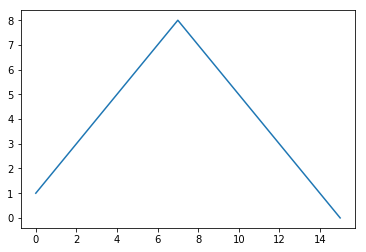

In [123]:
# 간단한 그래프 생성
plt.figure
plt.plot([1,2,3,4,5,6,7,8,7,6,5,4,3,2,1,0])
plt.show()

In [125]:
# numpy를 이용해서 sin을 생성 및 출력

import numpy as np
t = np.arange(1,12,0.01)
y = np.sin(t)

`np.arange`는 0부터 12까지 0.01 간격으로 데이터를 만들고, 그 리스트를 `np.sin`에 입력하면 sin 값이 나타남.  
t라는 시간 혹은 그래프상에서 x축을 의미하는 데이터를 0부터 12까지 만들고 사인 함수(`np.sin`)에 입력해서 그 출력을 y로 저장.  
t는 값을 하나만 가진 변수가 아님. 약 1200개 정도의 값을 가진 일종의 배열.  
그것을 반복문 없이 그냥 한줄로 처리가 가능

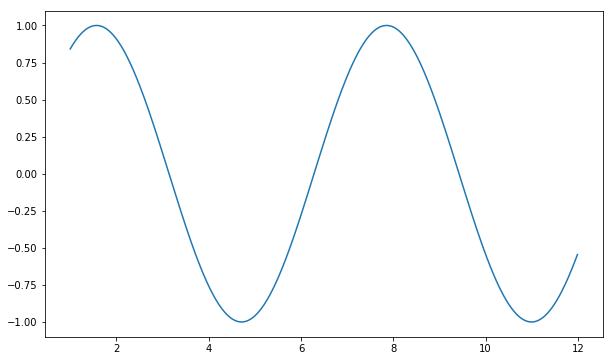

In [129]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

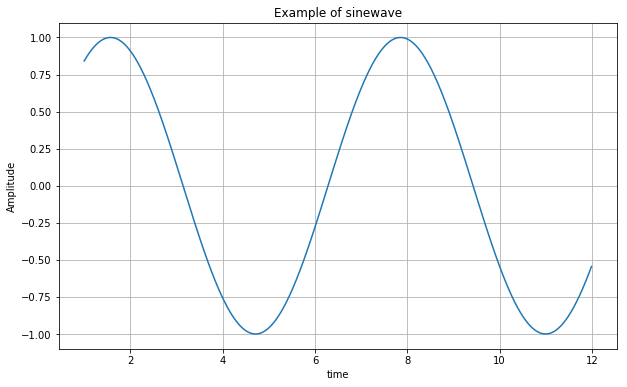

In [130]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()  # 격자 무늬
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

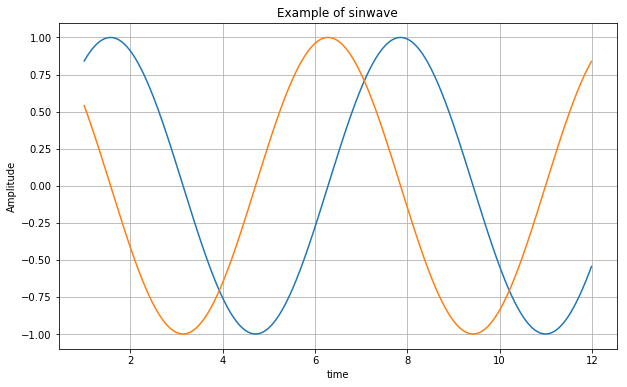

In [134]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))  # plot 명령을 두개 넣어서 한 화면에 출력
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinwave')
plt.show()

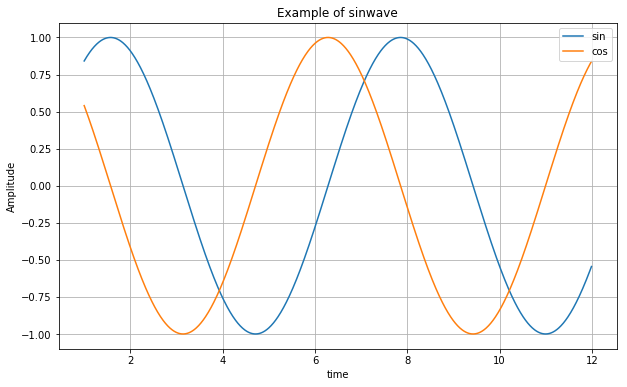

In [136]:
# 범례(legend)를 추가하려면 plot를 그릴 때 label 옵션으로 텍스트를 잡아주고,
# plt.legend()라고 명령하면 됨

plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinwave')
plt.show()

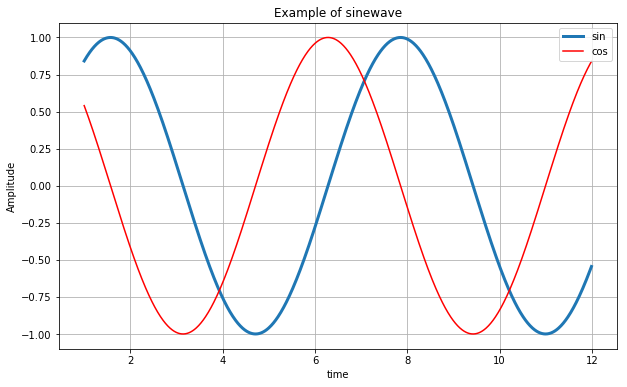

In [137]:
# lw 옵션으로 선의 굵기를 지정

plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

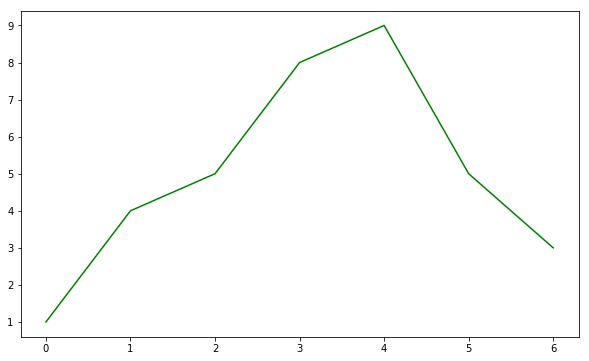

In [138]:
# color 옵션으로 색상을 지정

t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4 ,5 ,8, 9, 5, 3]
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

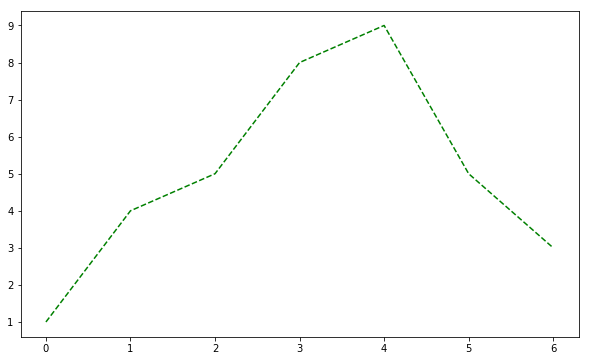

In [139]:
# linestyle='dashed' 옵션으로 선 스타일을 지정

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

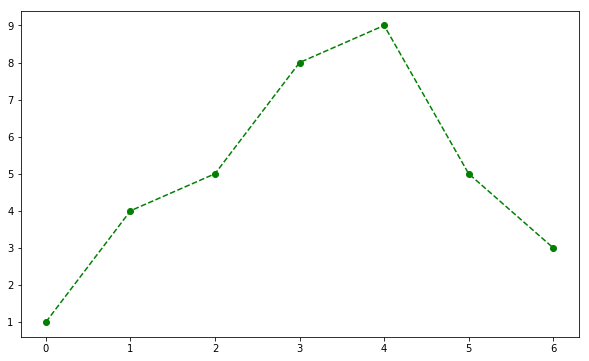

In [140]:
# marker 옵션으로 데이터가 존재하는 곳에 마킹

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

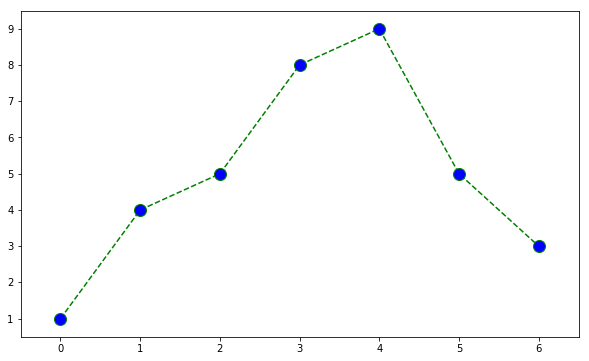

In [141]:
# makerfacecolor 옵션과 markersize 옵션으로 마커의 크기와 색상 지정

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=12)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [142]:
# 새로운 데이터 생성

t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

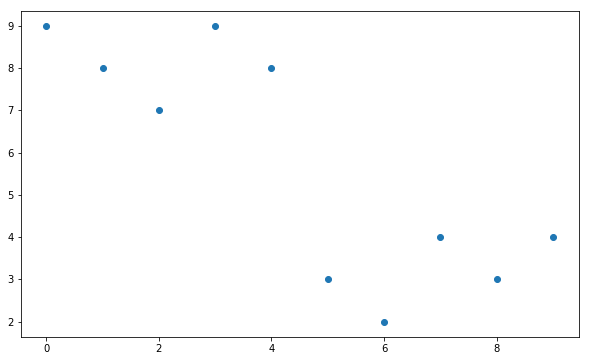

In [143]:
# scatter
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

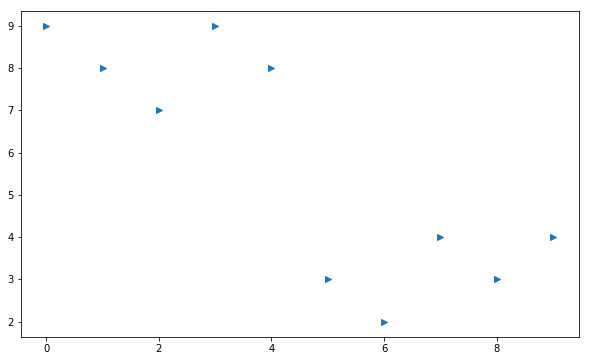

In [144]:
# 여기에 marker 지정
plt.figure(figsize=(10,6))
plt.scatter(t, y, marker='>')
plt.show()

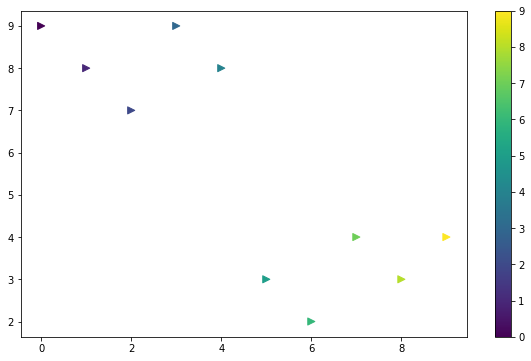

In [145]:
# colormap : x축 값인 t에 다라 색상을 바꿈  
# s 옵션은 마커의 크기

colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t, y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [146]:
# numpy의 랜덤변수 함수를 이용해 데이터 3개를 생성
# loc 옵션으로 평균값과 scale 옵션으로 표준 편차를 지정

s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

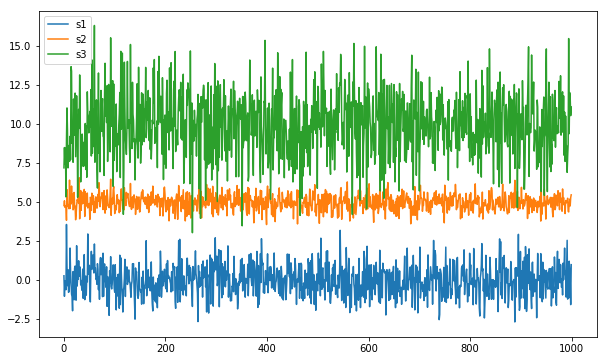

In [147]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

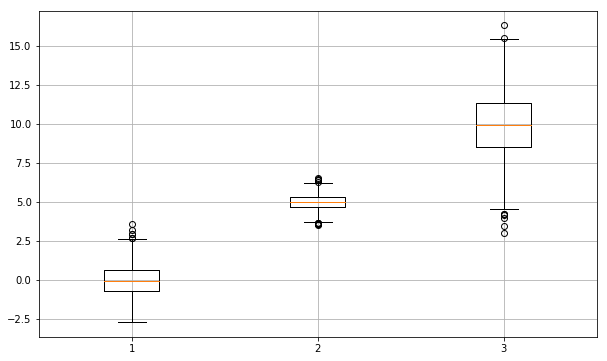

In [148]:
# boxplot
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()